# Kaggle | Titanic: Machine Learning from Disaster

## Introduction

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

A full description of the project can be found on https://www.kaggle.com/c/titanic

In [13]:
%matplotlib inline

import pandas as pd
import numpy as np

## Read data
The first step is to read the data from the file ```train.csv```. It contains the following attributes:

```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
```                

In [21]:
# Read train data
df = pd.read_csv('./data/train.csv')

print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891  non-null values
Survived       891  non-null values
Pclass         891  non-null values
Name           891  non-null values
Sex            891  non-null values
Age            714  non-null values
SibSp          891  non-null values
Parch          891  non-null values
Ticket         891  non-null values
Fare           891  non-null values
Cabin          204  non-null values
Embarked       889  non-null values
dtypes: float64(2), int64(5), object(5)None


## Clean data

A tidy data set is essential when analyzing data. A number of clean up operations have to be performed:
* Remove the null values
* Convert categorical data to binary (hoe heet dit???)
* Convert binary data types to float
* Label columns with meaningful lower case names

In [22]:
def clean(df):
    
    print 'Cleaning data'
    
    # Remove columns with too many null values
    df = df.drop('Cabin', axis=1)

    # Remove any rows with at least 1 null value
    # TODO: this involves values in the Age column, try to estimate missing values
    df = df.fillna(0)
    #df = df.dropna()

    # Convert the categorical Sex labels to float (1 = female, 0 = male)
    df['Gender'] = (df['Sex']=='female').astype(int)

    # Convert the categorical Embarked labels to float (1 = embarked, 0 = not embarked)
    df['embarked_q'] = (df['Embarked']=='Q').astype(float) # Queenstown
    df['embarked_c'] = (df['Embarked']=='C').astype(float) # Cherbourg
    df['embarked_s'] = (df['Embarked']=='S').astype(float) # Southampton

    # Drop unused columns
    df = df.drop(['Ticket','Name','Embarked','Sex'], axis=1)

    # Convert column names to lower case
    df.columns = map(str.lower, df.columns)

    return df

    # TODO: IMPROVEMENTS
    # age prediction: travelling alone or not; title (Ms./Mrs.)
    # married or not
    # TODO: age < 1.0 is a fraction; convert to 0? df[df['age'] < 1.0]


df = clean(df)

# Print results
print df.describe()

Cleaning data
       passengerid    survived      pclass         age       sibsp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   23.799293    0.523008   
std     257.353842    0.486592    0.836071   17.596074    1.102743   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000    6.000000    0.000000   
50%     446.000000    0.000000    3.000000   24.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            parch        fare      gender  embarked_q  embarked_c  embarked_s  
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.352413    0.086420    0.188552    0.722783  
std      0.806057   49.693429    0.477990    0.281141    0.391372    0.447876  
min      0.000000    0.000000    0.

##Visual exploration


In [23]:
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

print sns.__version__

sns.set(style="darkgrid")

0.5.1


### Correlation
Draw a correlation plot to discover weak or strong relations between attributes.

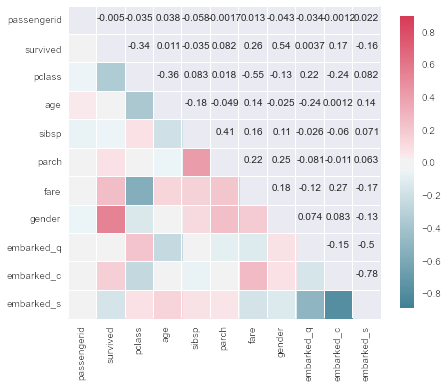

In [24]:
f, ax = plt.subplots(figsize=(7, 7))
cmap = sns.diverging_palette(220, 6, as_cmap=True)
sns.corrplot(df, annot=True, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)

From the plot above one can observe the following:
* a positive correlation between Sex and Survived indicates that women are more likely to survive than men.
* a negative correlation between Pclass and Survived indicates that passengers in higher classes are more likely to survive.
* a negative correlation between Pclass and Fare is explained by the fact that a ticket for a higher class (lower Pclass value) is generally more expensive than a ticket for a lower class (higher Pclass value).
* the passenger's age, number of siblings/spouses (SibSp) and the number of parents/children (Parch) aboard do not appear to correlate with the likelyhood of survival.

### Distribution

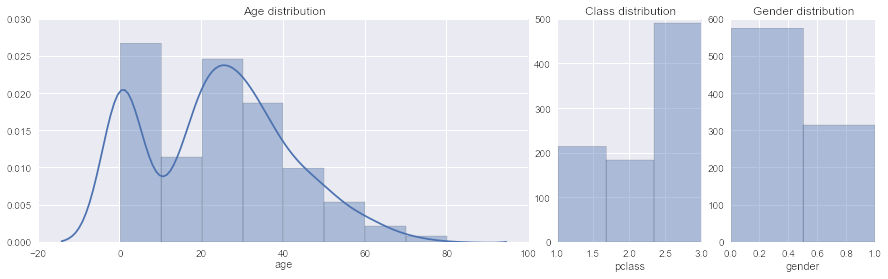

In [26]:
fig = plt.figure(figsize=(15,4), dpi=1600) 

# Age distribution
ax1 = plt.subplot2grid((1,5),(0,0), colspan=3)
sns.distplot(df['age'], kde=True, bins=8)
plt.title("Age distribution")

# Class distribution
plt.subplot2grid((1,5),(0,3))
sns.distplot(df['pclass'], kde=False, bins=3)
plt.title("Class distribution")

# Gender distribution
ax3 = plt.subplot2grid((1,5),(0,4))
sns.distplot(df['gender'], kde=False, bins=2)
plt.title("Gender distribution")


From the plots above one can observe the following:

* the age distribution is off, due to the fact that all NaN values are filled with 0.

* more than half of the passengers travelled third class, while the other half is (almost) evenly distributed over the first and second class.

* there were almost twize as much men aboard of the ship than women.

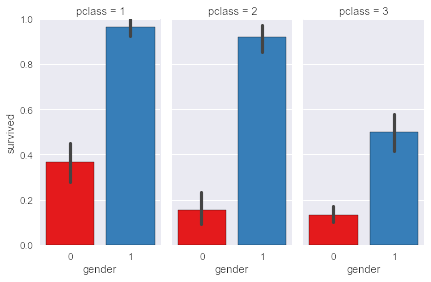

In [27]:
# Survival rate per class and gender
g = sns.FacetGrid(df, col="pclass", size=4, aspect=.5)
g.map(sns.barplot, "gender", "survived", palette="Set1");
g.add_legend();

In [28]:
train_data = df.values
train_data

array([[   1.,    0.,    3., ...,    0.,    0.,    1.],
       [   2.,    1.,    1., ...,    0.,    1.,    0.],
       [   3.,    1.,    3., ...,    0.,    0.,    1.],
       ..., 
       [ 889.,    0.,    3., ...,    0.,    0.,    1.],
       [ 890.,    1.,    1., ...,    0.,    1.,    0.],
       [ 891.,    0.,    3., ...,    1.,    0.,    0.]])

## Learning
Now that we have a clean data set and explored some of its features, we can start building a model for the prediction of survival.

### Support Vector Machines (SVM)

http://scikit-learn.org/stable/modules/svm.html#classification

svm.SVC(kernel='linear')
svc = svm.SVC(kernel='poly', degree=3)
svc = svm.SVC(kernel='rbf')

#### Training
The first step is to split the set in features and test samples (X) and class labels to predict (y). These sets are used to fit and score the model.

In [29]:
from sklearn import svm

clf = svm.SVC()
X_train = train_data[:, 2:] # columns 2 and above contain labeled data
y_train = train_data[:, 1]  # column 1 contains the predicted data ('survived')
clf.fit(X_train, y_train)   # fit the model
clf.score(X_train, y_train) # score

0.88776655443322106

#### Applying
Once the model is trained and has an acceptable score, the test data can be loaded into the model.

In [30]:
# Read the test data
df_test = pd.read_csv('./data/test.csv')

# Clean the data using the clean function as defined earlier
df_test = clean(df_test)

# Use the model to predict the survival of passengers and append it to the data frame
df_test['Survived'] = clf.predict(df_test.values[:, 1:]).astype(int)

print df_test.describe()

Cleaning data
   passengerid  pclass   age  sibsp  parch     fare  gender  embarked_q  \
0          892       3  34.5      0      0   7.8292       0           1   
1          893       3  47.0      1      0   7.0000       1           0   
2          894       2  62.0      0      0   9.6875       0           1   
3          895       3  27.0      0      0   8.6625       0           0   
4          896       3  22.0      1      1  12.2875       1           0   

   embarked_c  embarked_s  
0           0           0  
1           0           1  
2           0           0  
3           0           1  
4           0           1  
       passengerid      pclass         age       sibsp       parch  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    2.265550   24.044258    0.447368    0.392344   
std     120.810458    0.841838   17.599608    0.896760    0.981429   
min     892.000000    1.000000    0.000000    0.000000    0.000000   
25%     996.25000

#### Write results to file
You should submit a csv file with exactly 418 entries plus a header row. This must have exactly 2 columns: PassengerId (which can be sorted in any order), and Survived which contains your binary predictions: 1 for survived, 0 for did not.

In [31]:
df_test.rename(columns={'passengerid':'PassengerId'}, inplace=True)

df_test[['PassengerId', 'Survived']].to_csv('./data/output.csv', index=False)

print 'Done'

Done


### TODO: try other classifiers

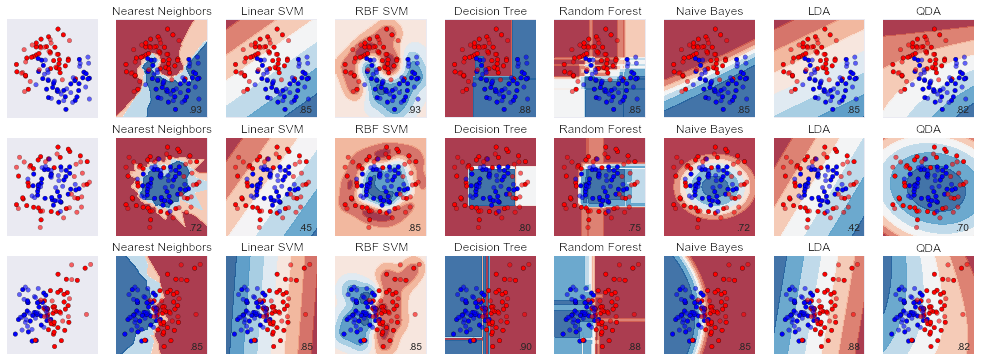

In [22]:
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", 
         #"AdaBoost", 
         "Naive Bayes", "LDA", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(14, 6))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=10, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

[[  2.  42.   0. ...,   0.   0.   1.]
 [  1.  36.   1. ...,   0.   0.   1.]
 [  3.  49.   0. ...,   0.   0.   1.]
 ..., 
 [  2.  25.   0. ...,   0.   0.   1.]
 [  3.   9.   4. ...,   0.   0.   1.]
 [  1.  25.   1. ...,   0.   1.   0.]]
[[  3.  21.   0. ...,   0.   0.   1.]
 [  3.  25.   1. ...,   0.   0.   1.]
 [  2.  50.   0. ...,   0.   0.   1.]
 ..., 
 [  1.  33.   1. ...,   1.   0.   0.]
 [  1.  38.   0. ...,   0.   0.   1.]
 [  3.   9.   3. ...,   0.   0.   1.]]
[ 1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.
  1.  1.  1.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.
  1.  1.  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  1.
  0.  0.  0.  1. 

ValueError: X.shape[1] = 2 should be equal to 9, the number of features at training time

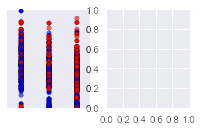

In [25]:
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA

h = .02  # step size in the mesh

names = [
    #"Nearest Neighbors", 
    "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", 
         #"AdaBoost", 
         "Naive Bayes", "LDA", "QDA"]
classifiers = [
#    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]


figure = plt.figure(figsize=(14, 6))
i = 1

# preprocess dataset, split into training and test part
X = train_data[:, 2:] # columns 2 and above contain labeled data
y = train_data[:, 1]  # column 1 contains the predicted data ('survived')

#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)


print X_train
print X_test
print y_train
print y_test

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=10, horizontalalignment='right')
    i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

In [ ]:
X = train_data[:, 2:]
y = train_data[:, 1]

X = X[y != 0, :2]

print X
print y


n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:.9 * n_sample]
y_train = y[:.9 * n_sample]
X_test = X[.9 * n_sample:]
y_test = y[.9 * n_sample:]



print X_train
print y_train
print X_test
print y_test

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()